# Example 14.4: Heating with Humidification

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
An air-conditioning system takes in atmospheric air at $40^\circ\mathrm{F}$, $1\ \mathrm{atm}$ with a $40\%$ relative humidity at a rate of $500\ \mathrm{CFM}$ and conditions it to a temperature of $78^\circ\mathrm{F}$ and a relative humidity of $60\%$ by first heating and then injecting saturated water vapor at $1\ \mathrm{atm}$ into the air. Determine:
* (a) The required rate of heat transfer from the coils
* (b) The required mass flow rate of steam

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=3074216&node=10465118&a=412854372&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [4]:
from kilojoule.templates.humidair_USCS_F import *

### Given

In [5]:
p_surr = Quantity(1,'atm')

# State 1 - Inlet
T[1] = Quantity(40,'degF')
rel_hum[1] = Quantity(0.4,'')
Vdot[1] = Quantity(500,'cfm')

# Water injection
p['w'] = Quantity(1,'atm')
x['w'] = Quantity(1,'')

# State 3 - Exit
T[3] = Quantity(78,'degF')
rel_hum[3] = Quantity(0.6,'')

Summary();

<IPython.core.display.Latex object>

,$T$ [°F],$p$ [psi],$x$ [],$\dot{V}$ [ft³/s],$rel_{hum}$ []
1,40.0,-,-,8.333333,0.4
3,78.0,-,-,-,0.6
w,-,14.695949,1.0,-,-


In [6]:
states.fix(1, humidair, T=T[1], rel_hum=rel_hum[1])
states.fix('w', humidair, p=p['w'], x=x['w'])
states.fix(3, humidair, T=T[3], rel_hum=rel_hum[3])
# h_w['inj'] = water.h(T['inj'],x['inj'])
Summary();

<IPython.core.display.Latex object>

,$T$ [°F],$p$ [psi],$v$ [ft³/lb_dry_air],$h$ [Btu/lb_dry_air],$h_{w}$ [Btu/lb_water],$s$ [Btu/lb_dry_air/°R],$x$ [],$\dot{V}$ [ft³/s],$T_{wb}$ [°F],$T_{dp}$ [°F],$rel_{hum}$ [],$\phi$ [],$\omega$ [lb_water/lb_dry_air]
1,40.0,-,12.631876,4.160569,-,0.008797,-,8.333333,31.649327,19.245757,0.4,0.4,0.002076
3,78.0,-,13.818947,24.586718,-,0.048758,-,-,67.908436,63.004532,0.6,0.6,0.012359
w,-,14.695949,-,-,1150.270401,-,1.0,-,-,-,-,-,-


#### (b) Steam flow rate

In [7]:
%%showcalc
"Mass flow rate"
mdot_a[1] = Vdot[1]/v[1]
mdot_a[3] = mdot_a[1]

"Water balance"
mdot_w['w'] = mdot_a[1]*(omega[3]-omega[1])

Mass flow rate
\begin{align}
  {\dot{m}_{a}}_{ {{1}} } &=  \frac{ {\dot{V}}_{ {{1}} } }{ {v}_{ {{1}} } } \\
    &= \frac{ 8.3333\ \frac{\mathrm{ft}^{3}}{\mathrm{s}} }{ 12.632\ \frac{\mathrm{ft}^{3}}{\mathrm{lb\_dry\_air}} }\\
    &= 0.65971\ \frac{\mathrm{lb\_dry\_air}}{\mathrm{s}}
\end{align}

\begin{align}
  {\dot{m}_{a}}_{ {{3}} } &=  {\dot{m}_{a}}_{ {{1}} }  = 0.65971\ \frac{\mathrm{lb\_dry\_air}}{\mathrm{s}} 
\end{align}

Water balance
\begin{align}
  {\dot{m}_{w}}_{ {{w}} } &=   {\dot{m}_{a}}_{ {{1}} }  \cdot  \left(  {\omega}_{ {{3}} } - {\omega}_{ {{1}} }  \right)  \\
    &=  0.65971\ \frac{\mathrm{lb\_dry\_air}}{\mathrm{s}}  \cdot  \left(  0.012359\ \frac{\mathrm{lb\_water}}{\mathrm{lb\_dry\_air}} - 0.0020761\ \frac{\mathrm{lb\_water}}{\mathrm{lb\_dry\_air}}  \right) \\
    &= 0.0067835\ \frac{\mathrm{lb\_water}}{\mathrm{s}}
\end{align}



#### (a) Heat input

In [8]:
%%showcalc
"1st Law"
Qdot_1_to_2 = (mdot_a[1]*(h[3]-h[1]) - mdot_w['w']*h_w['w']).to('Btu/min')

1st Law
\begin{align}
  \dot{Q}_{1\to{}2} &=    {\dot{m}_{a}}_{ {{1}} }  \cdot  \left(  {h}_{ {{3}} } - {h}_{ {{1}} }  \right)  -  {\dot{m}_{w}}_{ {{w}} }  \cdot  {h_{w}}_{ {{w}} }   \\
    &=   0.65971\ \frac{\mathrm{lb\_dry\_air}}{\mathrm{s}}  \cdot  \left(  24.587\ \frac{\mathrm{Btu}}{\mathrm{lb\_dry\_air}} - 4.1606\ \frac{\mathrm{Btu}}{\mathrm{lb\_dry\_air}}  \right)  -  0.0067835\ \frac{\mathrm{lb\_water}}{\mathrm{s}}  \cdot  1150.3\ \frac{\mathrm{Btu}}{\mathrm{lb\_water}}  \\
    &= 340.34\ \frac{\mathrm{Btu}}{\mathrm{min}}
\end{align}



### Psychrometric Chart

In [10]:
%%showcalc
"State 2"
omega[2] = omega[1]
h[2] = h[1] + Qdot_1_to_2/mdot_a[1]
states.fix(2,humidair,h=h[2],omega=omega[2])

State 2
\begin{align}
  {\omega}_{ {{2}} } &=  {\omega}_{ {{1}} }  = 0.0020761\ \frac{\mathrm{lb\_water}}{\mathrm{lb\_dry\_air}} 
\end{align}

\begin{align}
  {h}_{ {{2}} } &=  {h}_{ {{1}} } + \frac{ \dot{Q}_{1\to{}2} }{ {\dot{m}_{a}}_{ {{1}} } } \\
    &= 4.1606\ \frac{\mathrm{Btu}}{\mathrm{lb\_dry\_air}} + \frac{ 340.34\ \frac{\mathrm{Btu}}{\mathrm{min}} }{ 0.65971\ \frac{\mathrm{lb\_dry\_air}}{\mathrm{s}} }\\
    &= 12.759\ \frac{\mathrm{Btu}}{\mathrm{lb\_dry\_air}}
\end{align}



Fixing state 2 using $h=12.759\ \frac{\mathrm{Btu}}{\mathrm{lb\_dry\_air}}$, $omega=0.0020761\ \frac{\mathrm{lb\_water}}{\mathrm{lb\_dry\_air}}$
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>$T$ [°F]</th>
      <th>$p$ [psi]</th>
      <th>$v$ [ft³/lb_dry_air]</th>
      <th>$h$ [Btu/lb_dry_air]</th>
      <th>$h_{w}$ [Btu/lb_water]</th>
      <th>$s$ [Btu/lb_dry_air/°R]</th>
      <th>$x$ []</th>
      <th>$\dot{m}_{a}$ [lb_dry_air/s]</th>
      <th>$\dot{m}_{w}$ [lb_water/s]</th>
      <th>$\dot{V}$ [ft³/s]</th>
      <th>$T_{wb}$ [°F]</th>
      <th>$T_{dp}$ [°F]</th>
      <th>$rel_{hum}$ []</th>
      <th>$\phi$ []</th>
      <th>$\omega$ [lb_water/lb_dry_air]</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2</th>
      <td>75.647965</td>
      <td>-</td>
      <td>13.535933</td>
      <td>12.758928</td>
      <td>-</td>
      <td>0.025419</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>50.438103</td>
      <td>19.245757</td>
      <td>0.110761</td>
      <td>0.110761</td>
      <td>0.002076</td>
    </tr>
  </tbody>
</table>
<br />


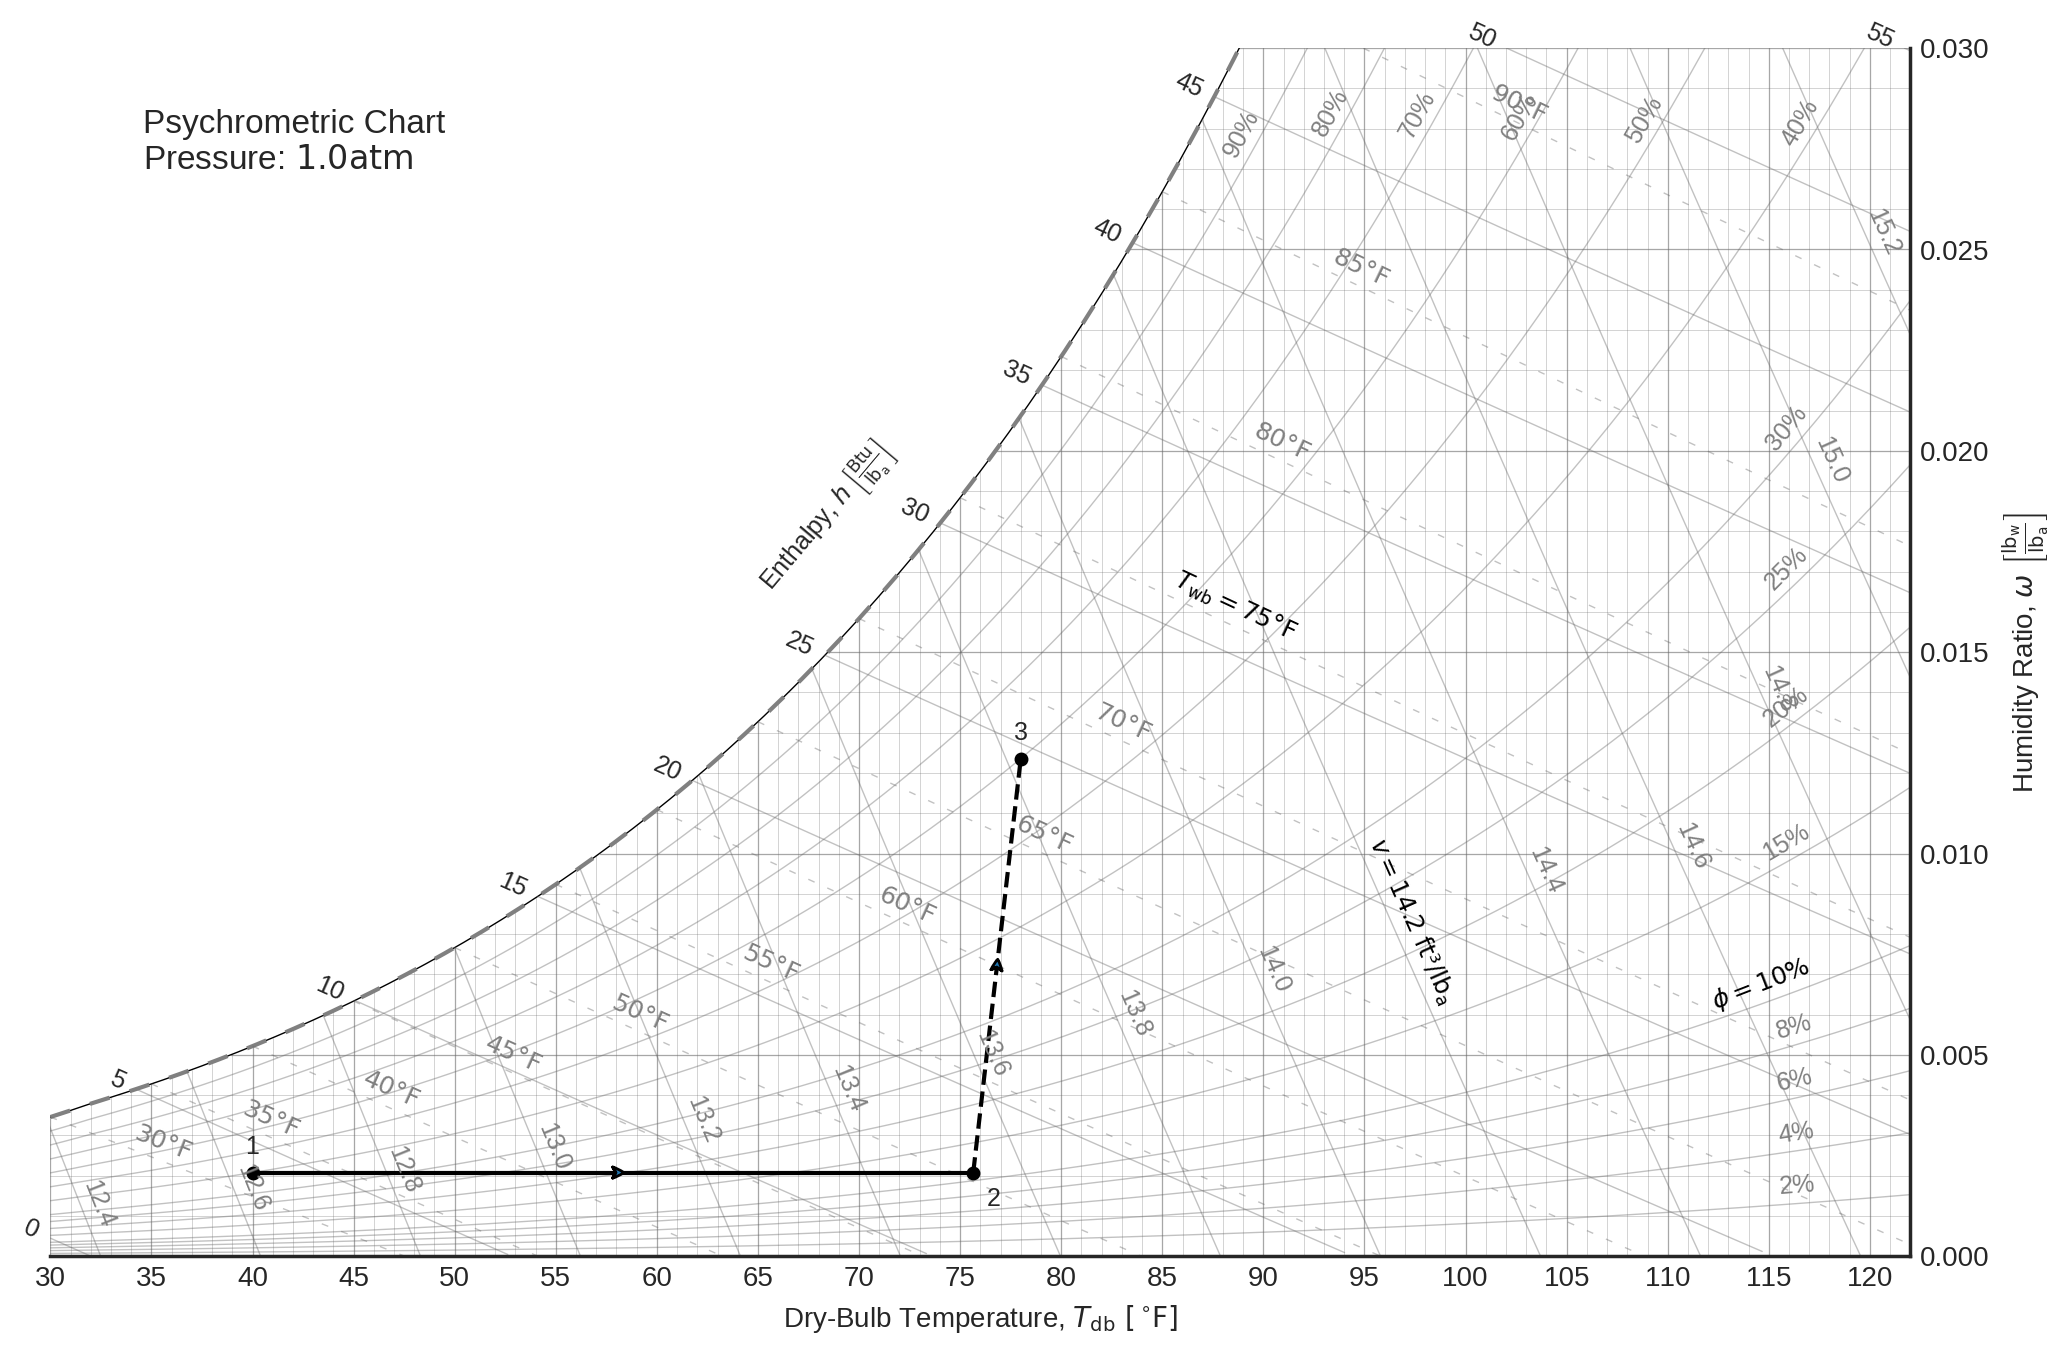

In [11]:
psych = humidair.psychrometric_chart(redraw=False)

# Plot States
psych.plot_state(states[1])
psych.plot_state(states[2],label_loc='south east')
psych.plot_state(states[3])

# Plot Processes
psych.plot_process(states[1],states[2],path='simple heating')
psych.plot_process(states[2],states[3]);

In [17]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 4) Execute this cell to create an HTML file showing only the output 
# 5) Submit the .html file located in the folder with this notebook

# !jupyter nbconvert --to html_embed --no-input --no-prompt "Ex14.4 Heating with Humidification.ipynb"